# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


In [1]:
# Start coding here...

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

# **1. Data Validation**

This data set has 947 rows, 8 columns. I have validated all variables and I have made several changes after validation: remove rows with null values in calories, carbohydrate, sugar, protein and replace null values in high_traffic with "Low".

- recipe: 947 unique identifiers without missing values (895 after dataset cleaning). No cleaning is needed.
- calories: 895 non-null values. I deleted 52 rows with null values (they are the same for calories, carbohydrate, sugar, protein).
- carbohydrate: 895 non-null values. I deleted 52 rows with null values.
- sugar: 895 non-null values. I deleted 52 rows with null values.
- protein: 895 non-null values. I deleted 52 rows with null values.
- category: 11 unique values without missing values, whereas there were 10 values in the description. The extra valie is 'Chicken Breast'. I united it with the 'Chicken' value.
- servings: 6 unique values without missing values. By description, it should be numeric variable, but now it's character. Has two extra values: '4 as a snack' and '6 as a snack'. I united them with '4' and '6' and changed the column's type to integer. 
- high_traffic: only 1 non-null value ("High"). Replaced null values with "Low".

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [3]:
df = pd.read_csv('recipe_site_traffic_2212.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [4]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [5]:
# validate recipe
df['recipe'].nunique()

947

In [6]:
# validate calories
df['calories'].nunique()

891

In [7]:
# validate carbohydrate
df['carbohydrate'].nunique()

835

In [8]:
# validate sugar
df['sugar'].nunique()

666

In [9]:
# validate protein
df['protein'].nunique()

772

In [10]:
# validate category
df['category'].nunique()

11

In [11]:
# validate servings
df['servings'].nunique()

6

In [12]:
# validate high_traffic
df['high_traffic'].nunique()

1

In [13]:
df['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [14]:
df['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [15]:
# create new dataframe for changing values and columns
# remove all recipes with null values in calories, carbohydrate, sugar and protein columns
df2 = df[df['calories'].notna()]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    object 
 7   high_traffic  535 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 62.9+ KB


In [16]:
# still 11 unique values
df2['category'].unique()

array(['Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Pork', 'Chicken', 'Vegetable',
       'Meat', 'Dessert'], dtype=object)

In [17]:
# still 6 unique values
df2['servings'].unique()

array(['4', '1', '2', '6', '4 as a snack', '6 as a snack'], dtype=object)

In [18]:
df2.groupby(['servings'])['category'].count()

servings
1               169
2               174
4               365
4 as a snack      2
6               184
6 as a snack      1
Name: category, dtype: int64

There are only 2 and 1 recipes of "4 as a snack" and "6 as a snack" servings, so I'll rename them to "4" and "6" for simplicity. 

In [19]:
df2['servings'] = df2['servings'].replace({"4 as a snack": '4', "6 as a snack": '6'}).astype('int')
df2.groupby(['servings'])['recipe'].count()

servings
1    169
2    174
4    367
6    185
Name: recipe, dtype: int64

In [20]:
df2['category'] = df2['category'].replace({"Chicken Breast": 'Chicken'})
df2.groupby(['category'])['recipe'].count()

category
Beverages         92
Breakfast        106
Chicken          163
Dessert           77
Lunch/Snacks      82
Meat              74
One Dish Meal     67
Pork              73
Potato            83
Vegetable         78
Name: recipe, dtype: int64

In [21]:
# replace null values of high_traffic with Low

df2['high_traffic'].fillna("Low", inplace = True)
df2.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Low
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    int64  
 7   high_traffic  895 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 62.9+ KB


In [23]:
# drop receipe, because it's an id and it's useless for exploratory analysis and classification.
df2 = df2.drop('recipe', axis=1)

In [24]:
#validate any negative values in numeric variables
df2.describe()

,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000
mean,435.939196,35.069676,9.046547,24.149296,3.458101
std,453.020997,43.949032,14.679176,36.369739,1.735979
min,0.140000,0.030000,0.010000,0.000000,1.000000
25%,110.430000,8.375000,1.690000,3.195000,2.000000
50%,288.550000,21.480000,4.550000,10.800000,4.000000
75%,597.650000,44.965000,9.800000,30.200000,4.000000
max,3633.160000,530.420000,148.750000,363.360000,6.000000


In [25]:
df2.drop_duplicates().shape

(895, 7)

# **2. Data Visualization**

I have investigated the target variable and features of the recipe, and the relationship between target variable and features. After the analysis, I decided to don't change variables.


## **Target Variable - high_traffic**

Since we need to predict the high_traffic, the high_traffic variable would be our target variable. 

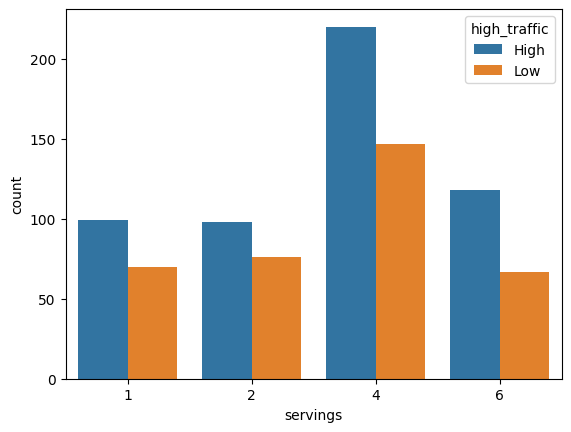

In [26]:
sns.countplot(df2, x="servings", hue="high_traffic")
plt.show()

Conclusion: for each serving, the amount of recipes with high traffic are more than the amount of recipes with low traffic, so this feature doesn't have a big influence on target variable.

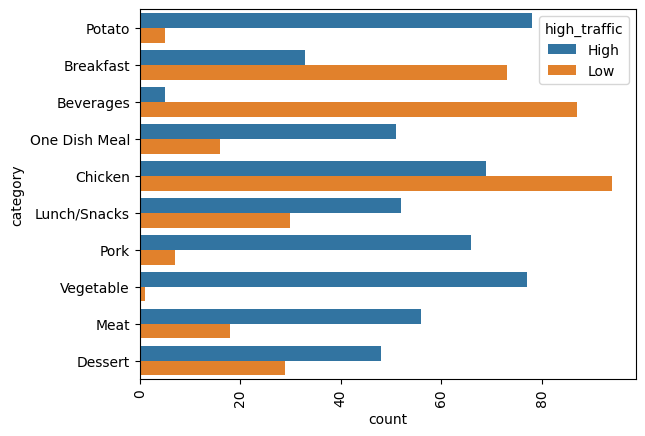

In [27]:
sns.countplot(df2, y="category", hue="high_traffic")
plt.xticks(rotation=90)
plt.show()

Conclusion: 

Potato, Pork and Vegetable categories have **a lot more recipes with high traffic** than with low traffic. 

One Dish Meal, Lunch/Snacks, Meat, Dessert categories have just **more recipes with high traffic** than with low traffic. 

## Numeric Variables - calories, carbohydrate, sugar, protein

From the heatmap below, we can conclude that there is a moderate linear negative relationship in 5 variables - calories, carbohydrate, sugar, protein, servings. All values are close to 0, so they are weakly connected. 

In [30]:
components = ['calories', 'carbohydrate', 'sugar', 'protein']
num_names = components + ['servings']

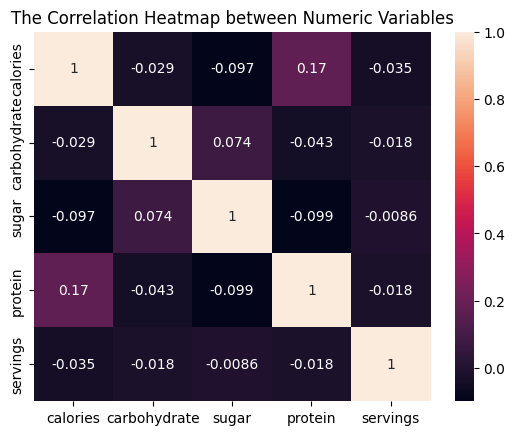

In [31]:
numeric = df2[num_names]
sns.heatmap(numeric.corr(), annot=True).set(title='The Correlation Heatmap between Numeric Variables');

## Categorical Variables - servings, category, high_traffic

I looked at the distribution of recipes by categorical variables.

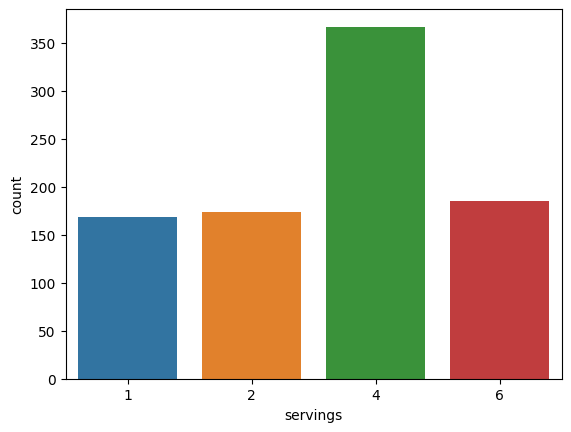

In [32]:
sns.countplot(df2, x="servings")
plt.show()

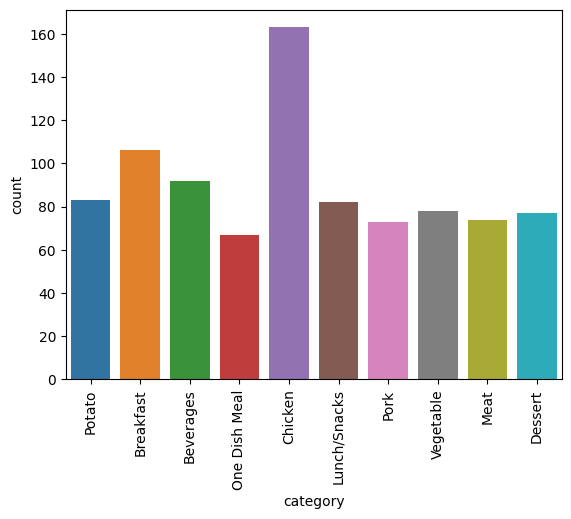

In [33]:
sns.countplot(df2, x="category")
plt.xticks(rotation=90)
plt.show()

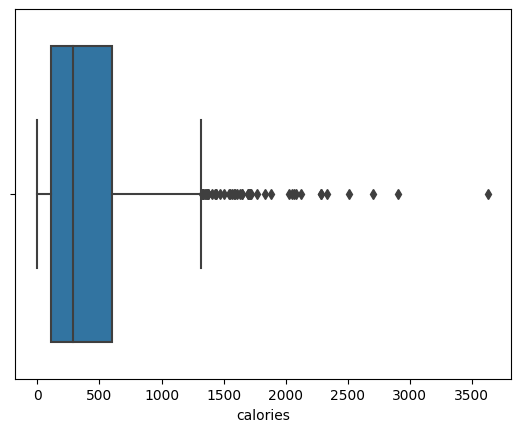

In [67]:
sns.boxplot(x='calories', data=df2)
plt.show()

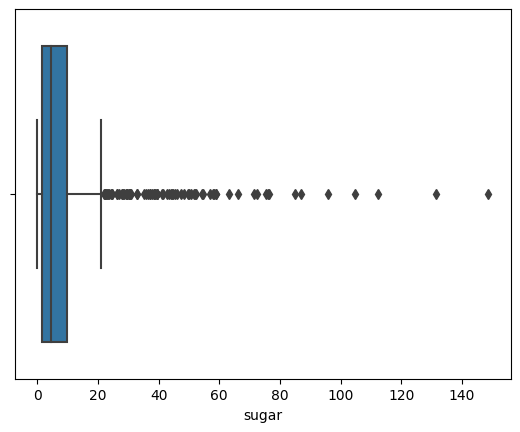

In [68]:
sns.boxplot(x='sugar', data=df2)
plt.show()

From the bar charts below, we can see the most frequent categories in servings, category, high_traffic variables in the dataset.

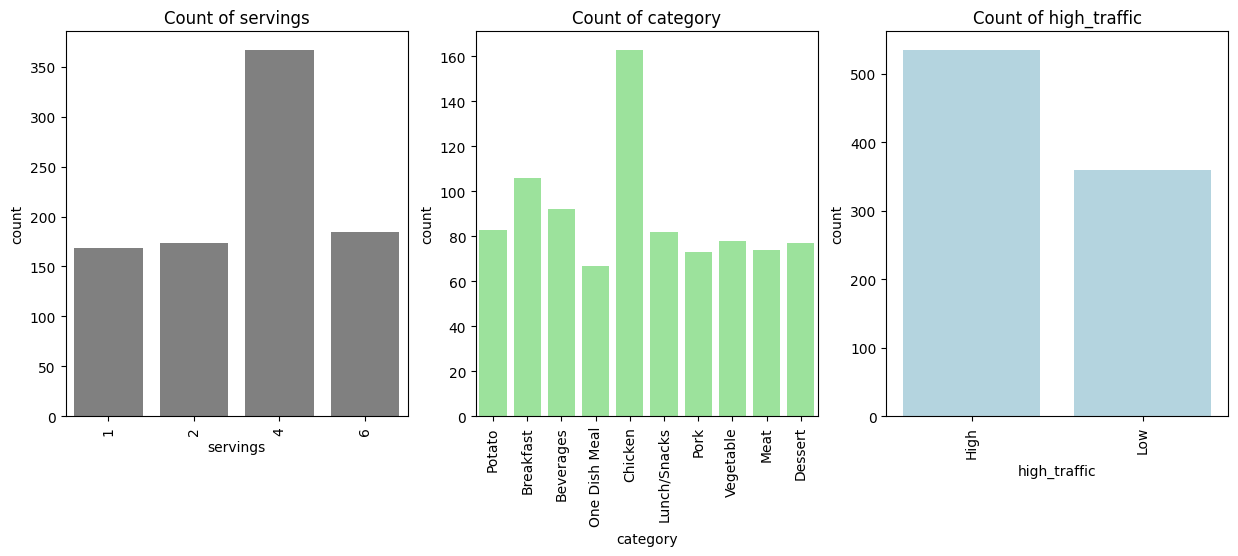

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(x=df2['servings'], color='gray', ax=axes[0]).set(title='Count of servings')
sns.countplot(x=df2['category'], color='lightgreen', ax=axes[1]).set(title='Count of category')
sns.countplot(x=df2['high_traffic'], color='lightblue', ax=axes[2]).set(title='Count of high_traffic')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

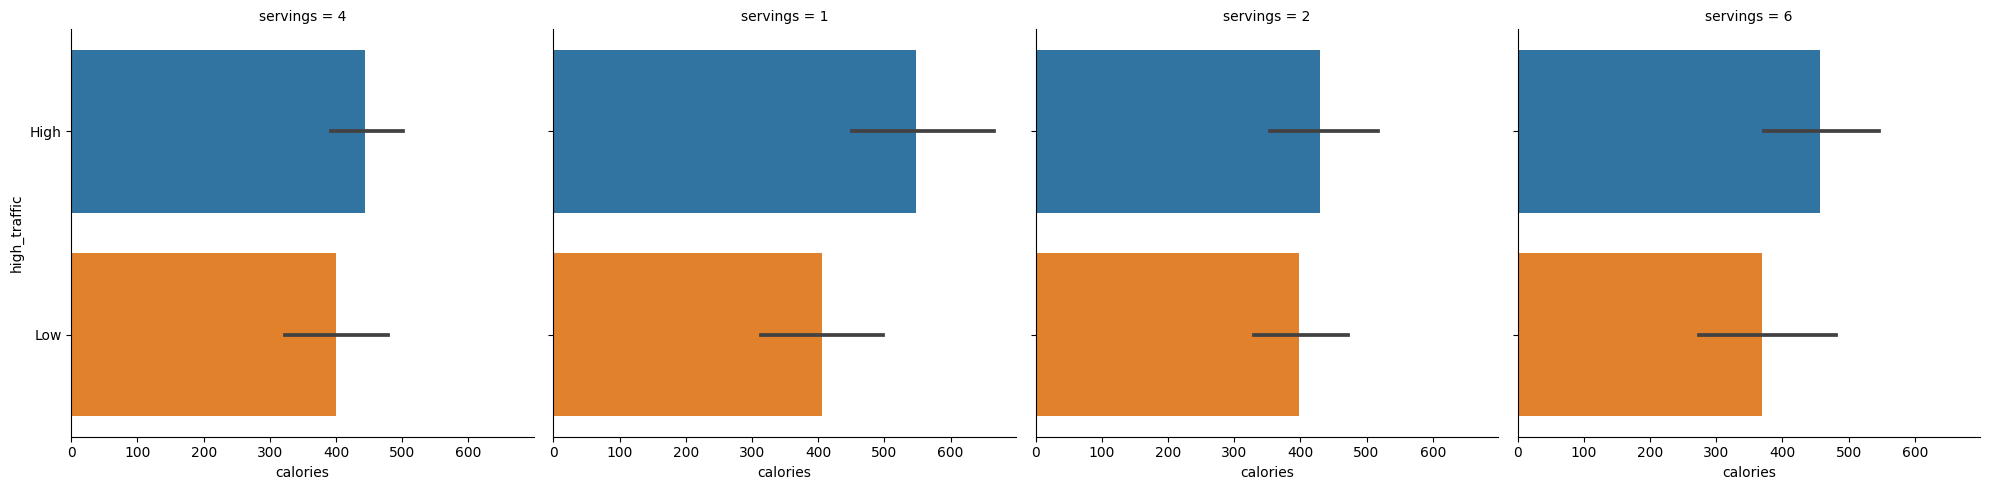

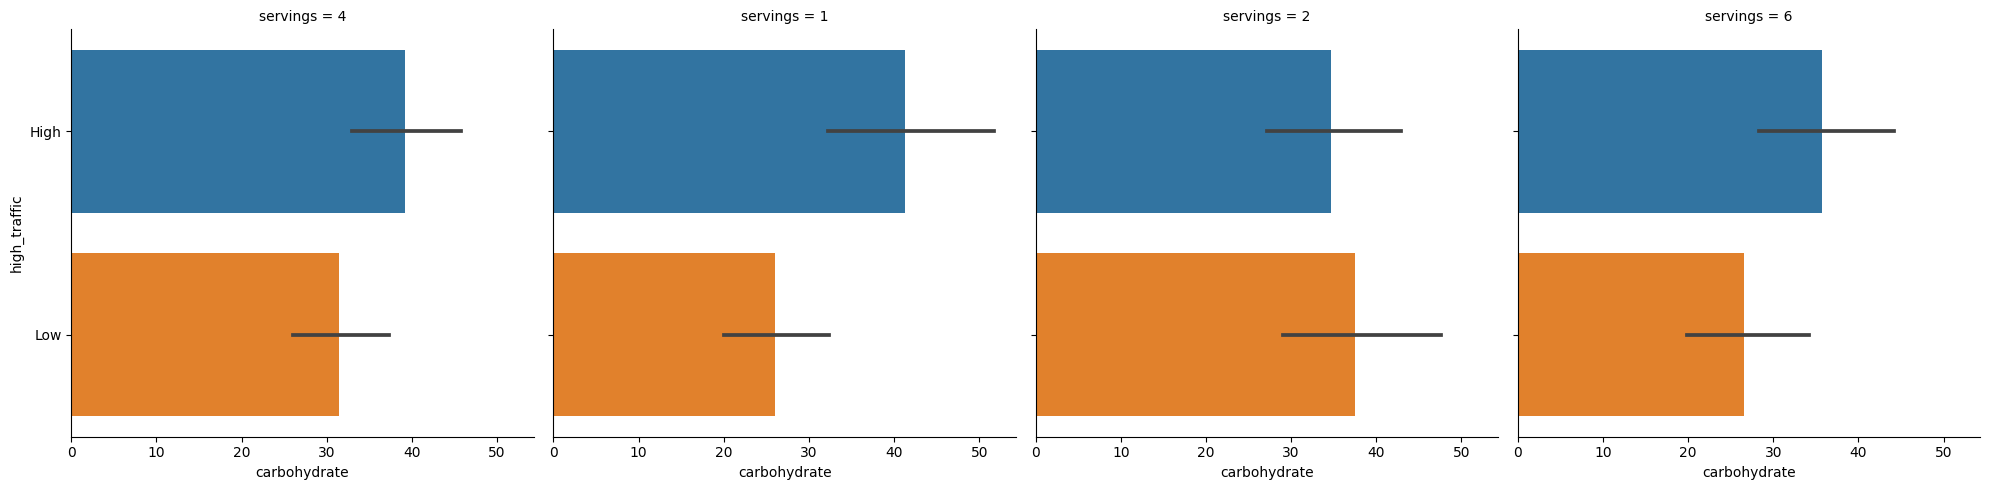

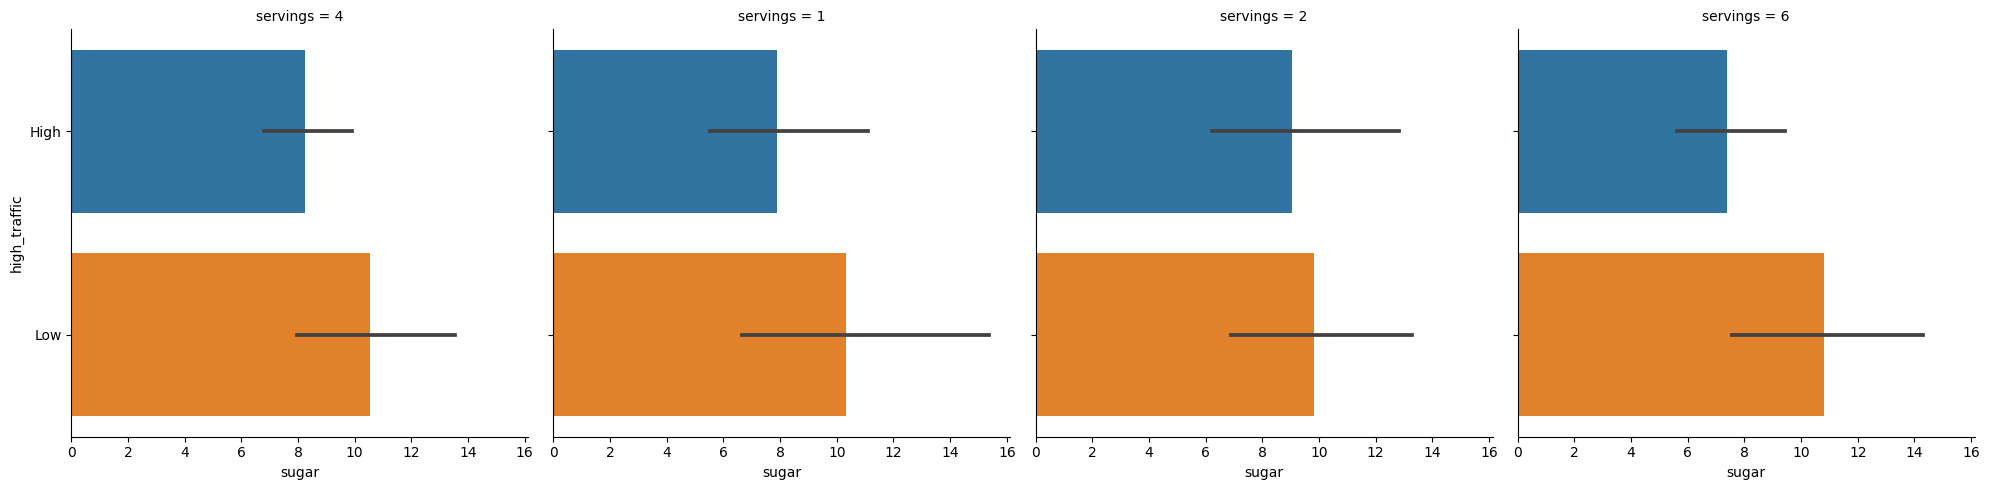

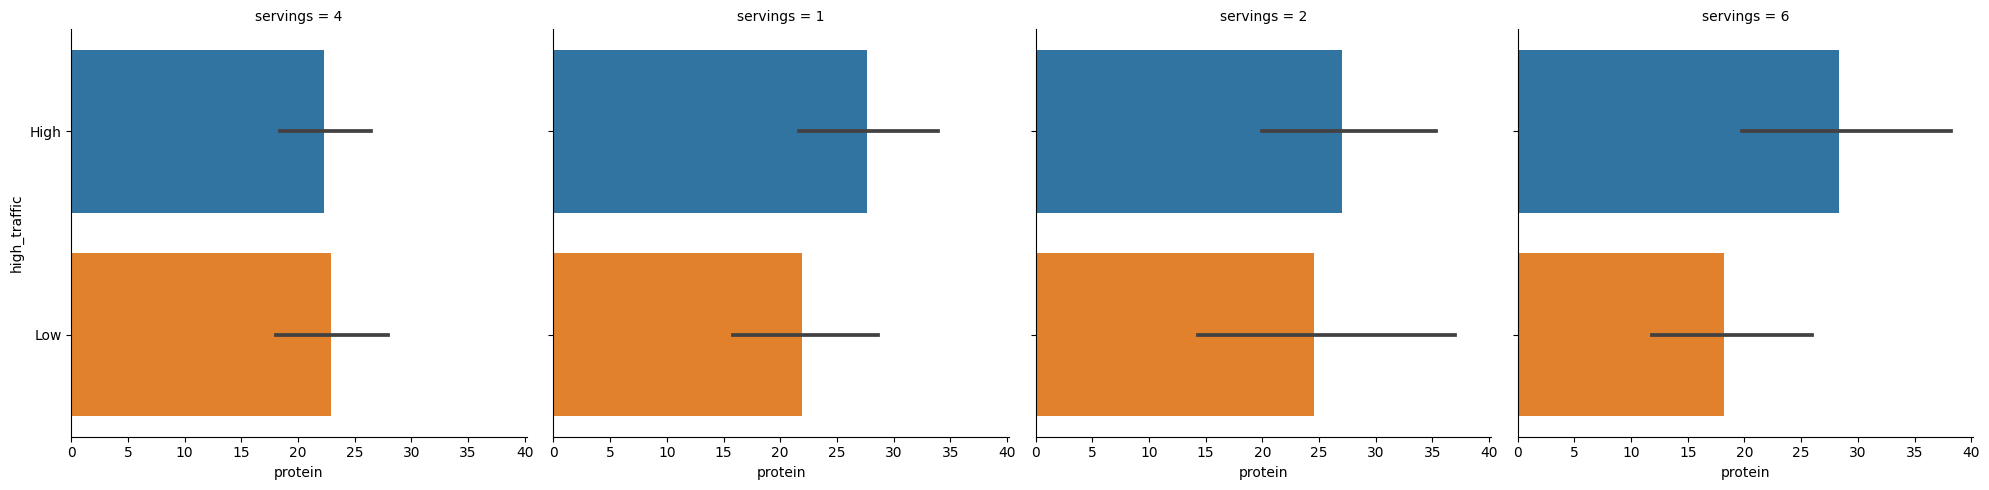

In [44]:
# for name in num_names:
#     sns.catplot(x=name,
#             y="high_traffic",
#             data=df2,
#             kind="bar", 
#             col="servings")
#     plt.show()

On the heatmap below I'll show the difference between the mean of high-traffic and the mean of low-traffic recepies, distributing by servings, categories and numerical features. 

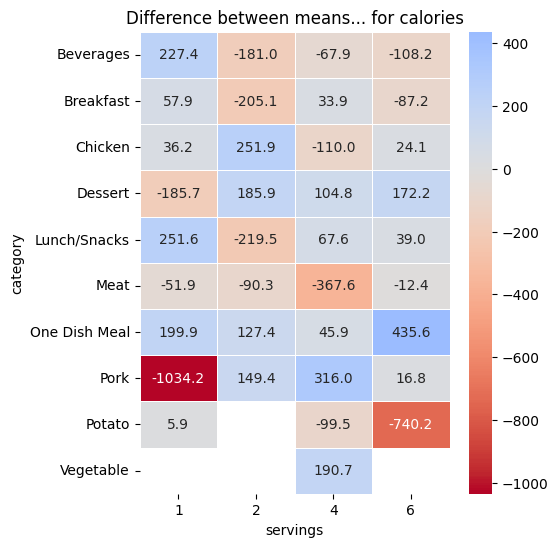

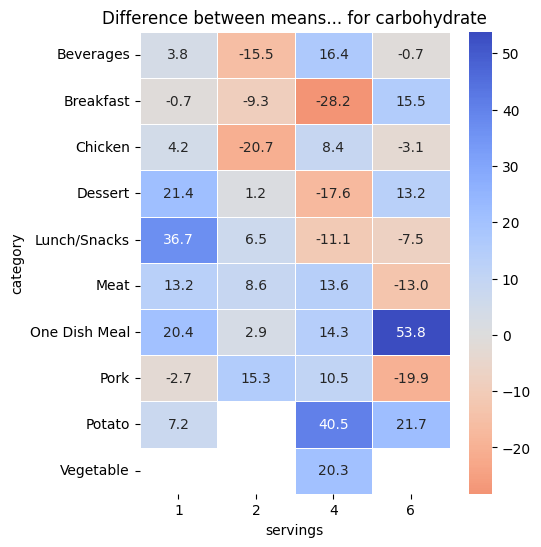

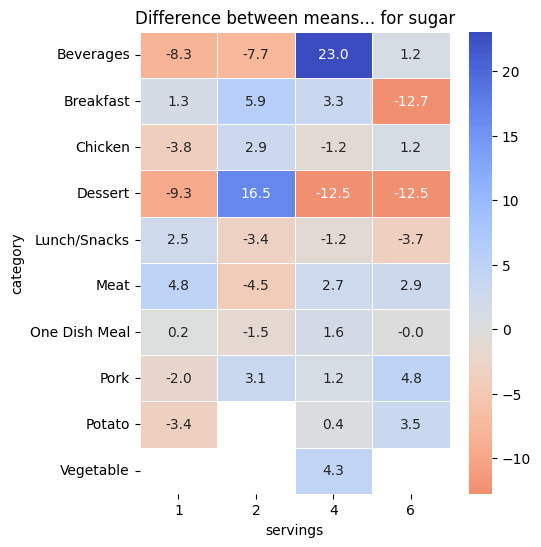

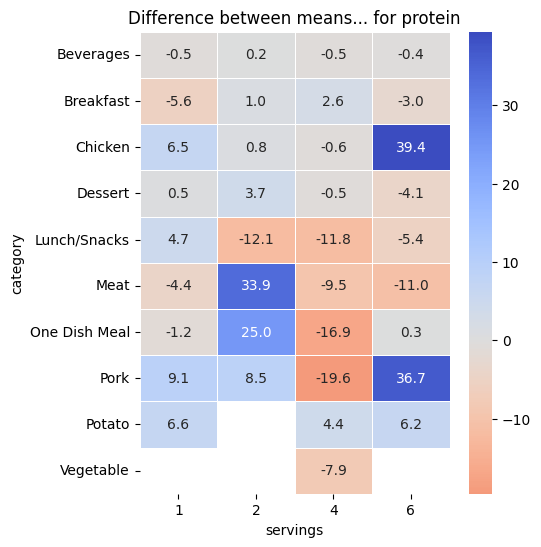

In [35]:
def diff_for_numerical(df2, name):
    df2_high_agg = pd.pivot_table(df2[df2['high_traffic'] == 'High'], index=["category"], columns=["servings"], values=name, aggfunc=np.mean) # 
    # df2_high_agg

    df2_low_agg = pd.pivot_table(df2[df2['high_traffic'] == 'Low'], index=["category"], columns=["servings"], values=name, aggfunc=np.mean)
    # df2_low_agg

    df2_diff = df2_high_agg.subtract(df2_low_agg)
    
    # cmap = plt.cm.coolwarm  # define the colormap # .jet
    # cmaplist = [cmap(i) for i in range(cmap.N)]

    f, ax = plt.subplots(figsize=(5, 6))
    sns.heatmap(df2_diff, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm_r", center=0) # "coolwarm" ["pink","lightgreen"] # cmaplist
    plt.title('Difference between means... for {0}'.format(name))
    plt.show()
    
    return df2_diff

for name in components:
    diff_for_numerical(df2, name)

<AxesSubplot:xlabel='high_traffic'>

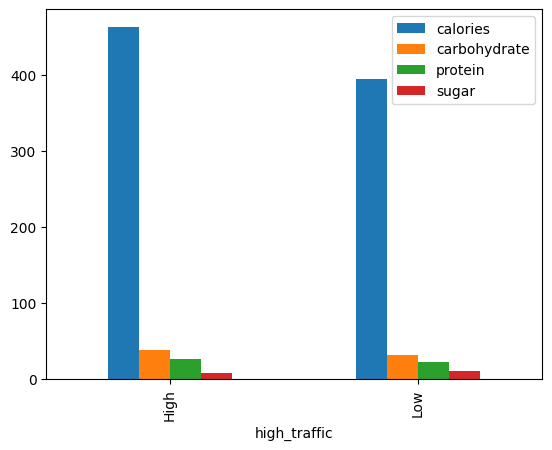

In [36]:
# df = data_pv.pivot(index='category', columns='gender', values='no_show_prop')
num_pivot_df = pd.pivot_table(df2, index=["high_traffic"], values=components, aggfunc=np.mean) # values=name, 
num_pivot_df.plot(kind='bar')

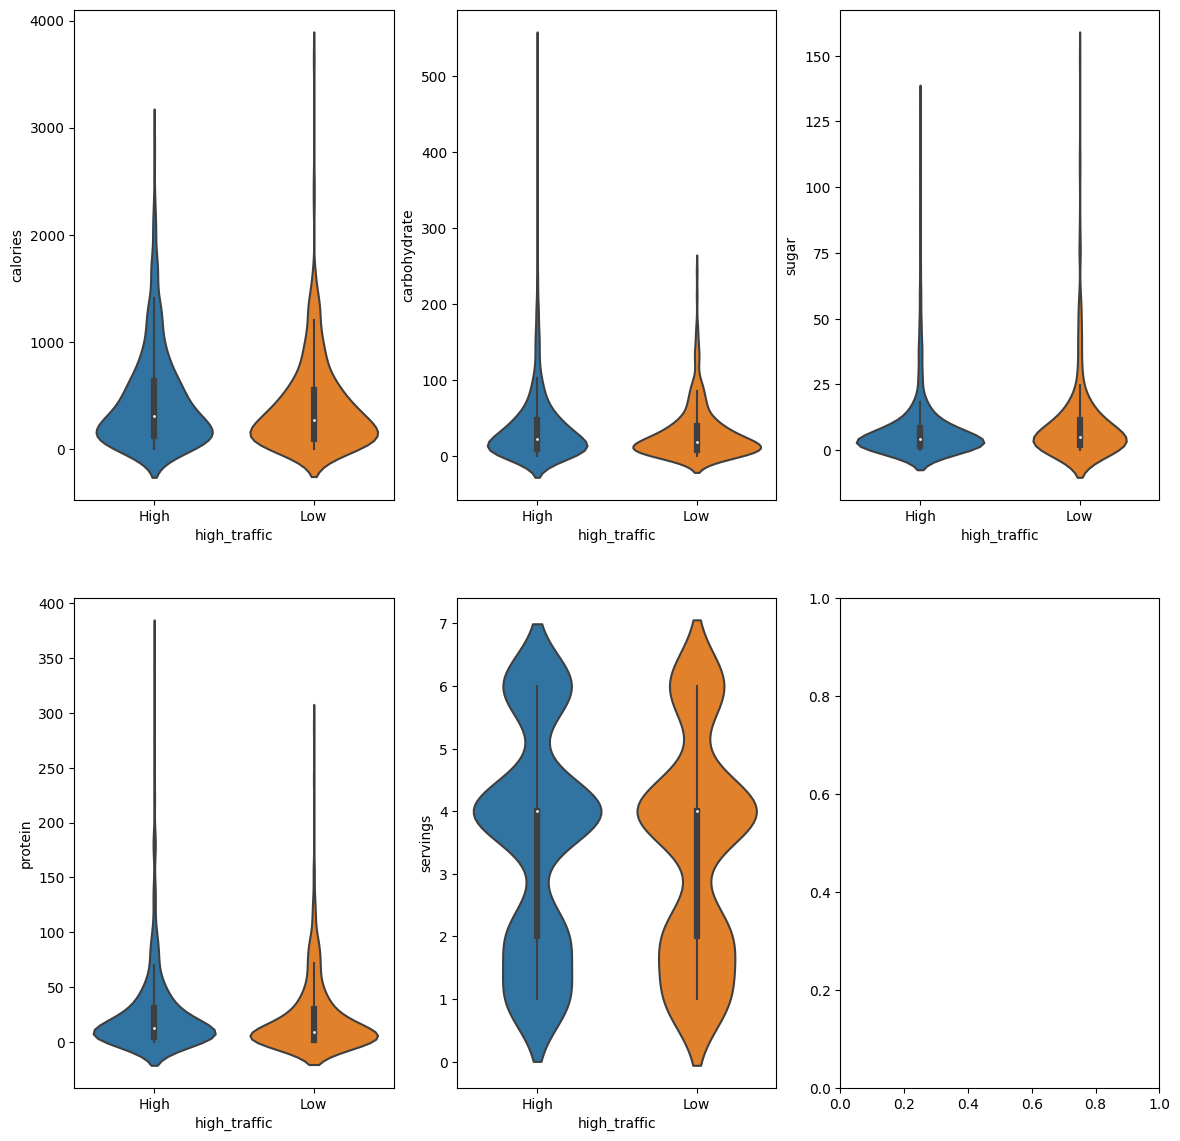

In [37]:
fig, ax = plt.subplots(2, 3, figsize=(14,14))
for name, ax in zip(num_names, ax.ravel()):
    sns.violinplot(data=df2, x='high_traffic', y=name, split=True, ax=ax)
plt.show()

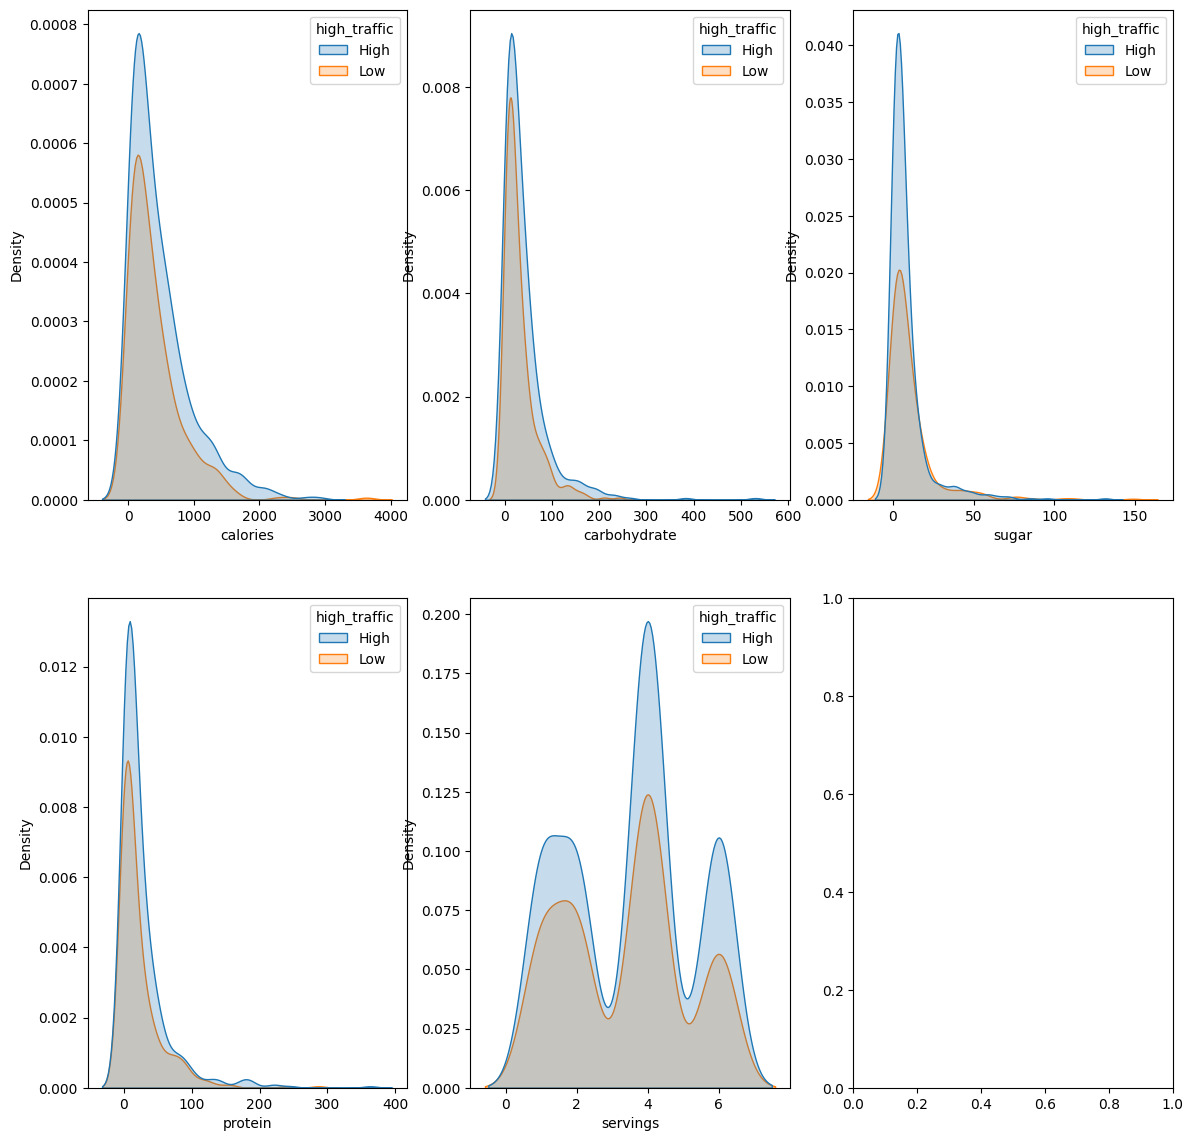

In [38]:
fig, ax = plt.subplots(2, 3, figsize=(14,14))
for name, ax in zip(num_names, ax.ravel()):
    sns.kdeplot(data=df2, hue='high_traffic', x=name, shade=True, ax=ax)
plt.show()

## Conclusion: 

The violin and the density plots shows that there are no significant depedencies of the traffic and the following numerical features: calories, carbohydrate, protein, sugar, servings. As I wrote above, there is no clear correlation between traffic and servings. The feature **category** has significant effect on the target variable.

# 3. Model Fitting

Predicting the high_traffic is a **binary classification problem** in machine learning. I am choosing the Logistic Regression, and Linear Support Vector Classification model as comparison model.


In [163]:
# Get dummies for 2 categorical variables: **category** and **servings**. Replace values of **high_traffic** to numerical 1/0.
# category_dummies = pd.get_dummies(df2["category"], drop_first=True)
# servings_dummies = pd.get_dummies(df2["servings"], drop_first=True)
# df3 = pd.concat([df2, category_dummies, servings_dummies], axis=1)
# df3 = df3.drop(["category","servings"], axis=1)
# df3['high_traffic'] = df3['high_traffic'].replace({"High": 1, "Low": 0})
# df3 = df3.drop(['recipe'], axis=1)
# df3.head()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

## Prepare Data for Modelling

To enable modelling, I chose **calories, carbohydrate, sugar, protein, servings, category** as features, **high_traffic** as target variables. I also have made the following changes:

- Convert the categorical variable **category** into numeric feature
- Normalize the numeric features
- Split the data into a training set and a test set

In [40]:
df3 = df2[list(df2)]

# Convert the categorical variables into numeric features
labelencoder = LabelEncoder()
df3['category'] = labelencoder.fit_transform(df3['category'])
# df3['servings'] = labelencoder.fit_transform(df3['servings'])
df3['high_traffic'] = df3['high_traffic'].replace({"High": 1, "Low": 0})

X = df3.drop(['high_traffic'], axis=1) # Features
y = df3['high_traffic'] # Target variable
# X = df3.drop(['high_traffic'], axis=1) # Features
# y = df3['high_traffic'] # Target variable

# Normalize the numeric features
# scaler = PowerTransformer()
scaler = StandardScaler()
# scaler = MinMaxScaler()
X[num_names] = scaler.fit_transform(X[num_names])

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [41]:
labels_dict = dict(zip(labelencoder.classes_, range(len(labelencoder.classes_))))
labels_dict

{'Beverages': 0,
 'Breakfast': 1,
 'Chicken': 2,
 'Dessert': 3,
 'Lunch/Snacks': 4,
 'Meat': 5,
 'One Dish Meal': 6,
 'Pork': 7,
 'Potato': 8,
 'Vegetable': 9}

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      895 non-null    int64  
 5   servings      895 non-null    int64  
 6   high_traffic  895 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 55.9 KB


## **Model 1. Logistic Regression**

In [43]:
grid = {
    "C": np.logspace(-3, 3, 7), # from -0.001 to 1000 by 7 steps
    "penalty": ["l1", "l2", "elasticnet", None], # l1 lasso l2 ridge
    "multi_class": ["auto", "ovr", "multinomial"]
}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(X_train, y_train)

print("Tuned hyperparameters:", logreg_cv.best_params_)
# print("Accuracy:", logreg_cv.best_score_)

Tuned hyperparameters: {'C': 0.001, 'multi_class': 'multinomial', 'penalty': 'l2'}


## Model 2: Linear Support Vector Classification

In [46]:
# LinearSVC

grid = {
    "C": np.logspace(-3, 3, 7), # from -0.001 to 1000 by 7 steps
    # "multi_class": ["ovr", "crammer_singer"],
    "penalty": ["l1", "l2"],
    "loss": ["hinge", "squared_hinge"]
}
svm = LinearSVC()
svm_cv = GridSearchCV(svm, grid, cv=10)
svm_cv.fit(X_train, y_train)

print("Tuned hyperparameters:", svm_cv.best_params_)
# print("Accuracy:", svm_cv.best_score_)

Tuned hyperparameters: {'C': 1.0, 'loss': 'hinge', 'penalty': 'l2'}


In [71]:
# Decision Tree Classification

grid = {
    "criterion": ['gini', 'entropy', 'log_loss'],
    'max_depth': range(2, 7), 
    "splitter": ["best", "random"]
    # 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'
}
clf = DecisionTreeClassifier()
clf_cv = GridSearchCV(clf, grid, cv=10)
clf_cv.fit(X_train, y_train)

print("Tuned hyperparameters:", clf_cv.best_params_)
print("Accuracy:", clf_cv.best_score_)

clf2 = DecisionTreeClassifier(criterion="log_loss", max_depth=4, splitter='random')
clf2.fit(X_train, y_train)
y_pred_clf = clf2.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_clf))
print("Classification report:\n", classification_report(y_test, y_pred_clf))


Tuned hyperparameters: {'criterion': 'gini', 'max_depth': 2, 'splitter': 'random'}
Accuracy: 0.7638760880696364
Confusion matrix:
 [[ 55  56]
 [ 19 139]]
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.50      0.59       111
           1       0.71      0.88      0.79       158

    accuracy                           0.72       269
   macro avg       0.73      0.69      0.69       269
weighted avg       0.73      0.72      0.71       269



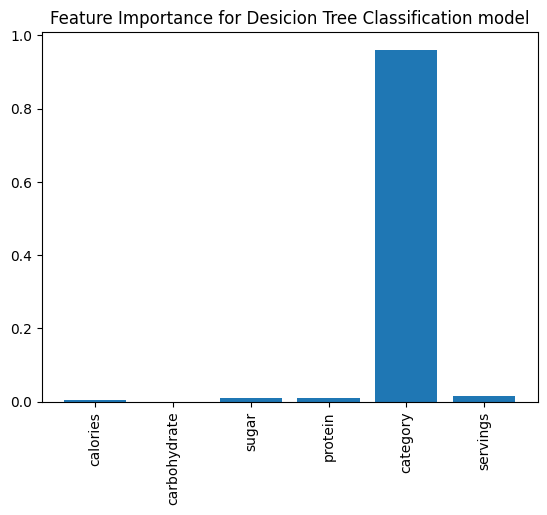

In [91]:
importance = clf2.feature_importances_

f_importance = {}
for i in range(len(list(X))):
     f_importance[list(X)[i]] = importance[i]
        
plt.bar(f_importance.keys(),f_importance.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance for Desicion Tree Classification model');

In [49]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print("Accuracy on training set: {0}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {0}".format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)
# print('R2_score: {0}'.format(r2_score(y_test, y_pred)))

d_mse = mean_squared_error(y_pred, y_test)
d_rmse = np.sqrt(d_mse)
print("RMSE: {0}".format(d_rmse))

Accuracy on training set: 1.0
Accuracy on test set: 0.6394052044609665
RMSE: 0.6004954583833532


In [149]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Accuracy on training set: {0}".format(logreg.score(X_train, y_train)))
print("Accuracy on test set: {0}".format(logreg.score(X_test, y_test)))

y_pred = logreg.predict(X_test)
print('R2_score: {0}'.format(r2_score(y_test, y_pred)))

d_mse = mean_squared_error(y_pred, y_test)
d_rmse = np.sqrt(d_mse)
print("RMSE: {0}".format(d_rmse))

Accuracy on training set: 0.7651757188498403
Accuracy on test set: 0.7732342007434945
R2_score: 0.06437450108336196
RMSE: 0.47619932723231095


In [151]:
# K-Nearest Neighbors

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print("Accuracy on training set: {0}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {0}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.7268370607028753
Accuracy on test set: 0.5724907063197026


In [153]:
# SVC

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

print("Accuracy on training set: {0}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {0}".format(svm.score(X_test, y_test)))

Accuracy on training set: 0.6038338658146964
Accuracy on test set: 0.587360594795539


In [162]:
grid = {
    "C": np.logspace(-3, 3, 7), # from -0.001 to 1000 by 7 steps
    "penalty": ["l1", "l2"] # l1 lasso l2 ridge
}
svm = LinearSVC()
svm_cv = GridSearchCV(svm, grid, cv=10)
svm_cv.fit(X_train, y_train)

print("Tuned hyperparameters:", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)

svm2 = LinearSVC(C=0.001, penalty="l2")
svm2.fit(X_train, y_train)
print("Score:", svm2.score(X_test, y_test))

y_pred = svm2.predict(X_test)
print('R2_score: {0}'.format(r2_score(y_test, y_pred)))

d_mse = mean_squared_error(y_pred, y_test)
d_rmse = np.sqrt(d_mse)
print("RMSE: {0}".format(d_rmse))

Tuned hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Accuracy: 0.7462109575012801
Score: 0.7063197026022305
R2_score: -0.21171171171171155
RMSE: 0.5419227780761476


In [160]:
grid = {
    "n_neighbors": range(5, 40),
    "metric": ["cosine","euclidean","l1","l2","manhattan"]
}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=10)
knn_cv.fit(X_train, y_train)

print("Tuned hyperparameters:", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)

knn2 = KNeighborsClassifier(n_neighbors=35, metric="l1")
knn2.fit(X_train, y_train)
print("Score:", knn2.score(X_test, y_test))

y_pred = knn2.predict(X_test)
print('R2_score: {0}'.format(r2_score(y_test, y_pred)))

d_mse = mean_squared_error(y_pred, y_test)
d_rmse = np.sqrt(d_mse)
print("RMSE: {0}".format(d_rmse))

Tuned hyperparameters: {'metric': 'l1', 'n_neighbors': 35}
Accuracy: 0.6566564260112648
Score: 0.6282527881040892
R2_score: -0.5338122933059639
RMSE: 0.6097107608496923


# 4. Model Evaluation

For the evaluation, I am choosing **Precision, Recall** and **F1 Score**. Precision measures the percentage of true positives among retrieved positives, recall measures the percentage of true negatives among retrieved negatives, while F1 Score is a harmonic mean of precision and recall.

In [44]:
logreg2 = LogisticRegression(C=0.001, multi_class='multinomial', penalty="l2") # best parameters
logreg2.fit(X_train, y_train)
y_pred_logreg = logreg2.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification report:\n", classification_report(y_test, y_pred_logreg))
# y_pred_probs_logreg = logreg2.predict_proba(X_test)[:, 1]
# print(y_pred_probs_logreg[0])
# print(roc_auc_score(y_test, y_pred_probs_logreg))

Confusion matrix:
 [[ 77  34]
 [ 28 130]]
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       111
           1       0.79      0.82      0.81       158

    accuracy                           0.77       269
   macro avg       0.76      0.76      0.76       269
weighted avg       0.77      0.77      0.77       269



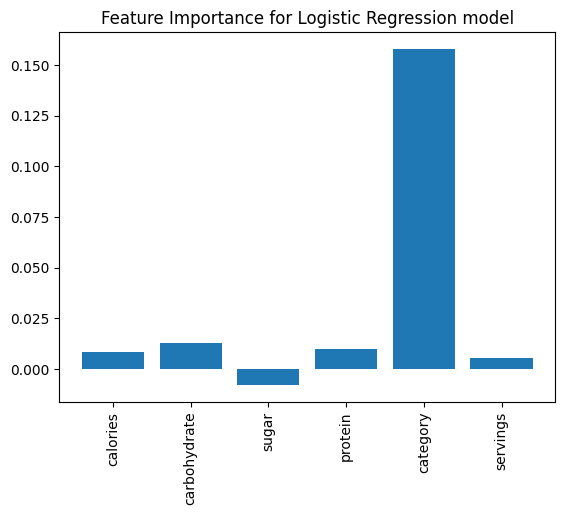

In [45]:
resultdict = {}
for i in range(len(list(X))):
    resultdict[list(X)[i]] = logreg2.coef_[0][i]
    
plt.bar(resultdict.keys(),resultdict.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance for Logistic Regression model');

As I noticed above, the category has the main effect on High traffic.

In [47]:
svm2 = LinearSVC(C=1.0, loss='hinge', penalty='l2') # best parameters
svm2.fit(X_train, y_train)
y_pred_svm = svm2.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification report:\n", classification_report(y_test, y_pred_svm))

Confusion matrix:
 [[ 77  34]
 [ 32 126]]
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70       111
           1       0.79      0.80      0.79       158

    accuracy                           0.75       269
   macro avg       0.75      0.75      0.75       269
weighted avg       0.75      0.75      0.75       269



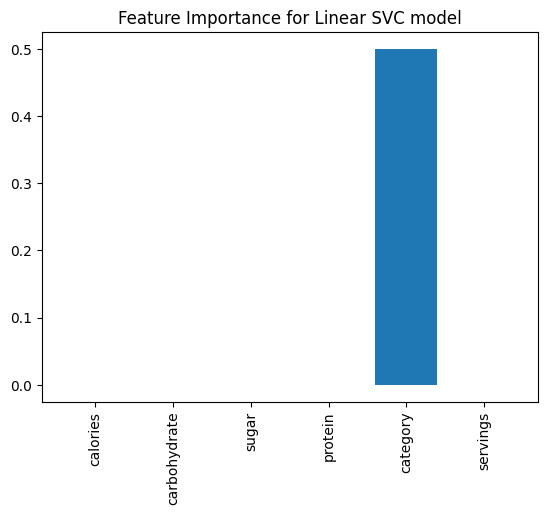

In [48]:
resultdict = {}
for i in range(len(list(X))):
    resultdict[list(X)[i]] = svm2.coef_[0][i]
    
plt.bar(resultdict.keys(),resultdict.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance for Linear SVC model');

**Conclusion:**

Precision, recall and F1 Score of High traffic by the Logistic Regression model are 0.79, 0.82, 0.81, and by Linear Support Vector Classification model are 0.79, 0.80, 0.79. That means the **Logistic Regression model fits the features better and has less error in predicting values**.

# 5. Business Focus & Metrics

The business focus is **to predict the "High" value of traffic of the recipes with 80% probability**. 

The Logistic Regression model can do it as we can see with Precision, recall and F1 Score metrics. 

We need accuracy metric to evaluate the fraction of predictions our model got right. The Logistic Regression model I built can predict this rate with **77% of accuracy**, whereas the Linear SVC - with 75%.


In [63]:
# accuracy score on the train data
X_train_pred = logreg2.predict(X_train)
print('Accuracy score of the train data: ', accuracy_score(X_train_pred, y_train))

# accuracy score on the test data
X_test_pred = logreg2.predict(X_test)
print('Accuracy score of the test data: ', accuracy_score(X_test_pred, y_test))

Accuracy score of the train data:  0.7619808306709265
Accuracy score of the test data:  0.7695167286245354


In [64]:
# accuracy score on the train data
X_train_pred = svm2.predict(X_train)
print('Accuracy score of the train data: ', accuracy_score(X_train_pred, y_train))

# accuracy score on the test data
X_test_pred = svm2.predict(X_test)
print('Accuracy score of the test data: ', accuracy_score(X_test_pred, y_test))

Accuracy score of the train data:  0.768370607028754
Accuracy score of the test data:  0.7546468401486989


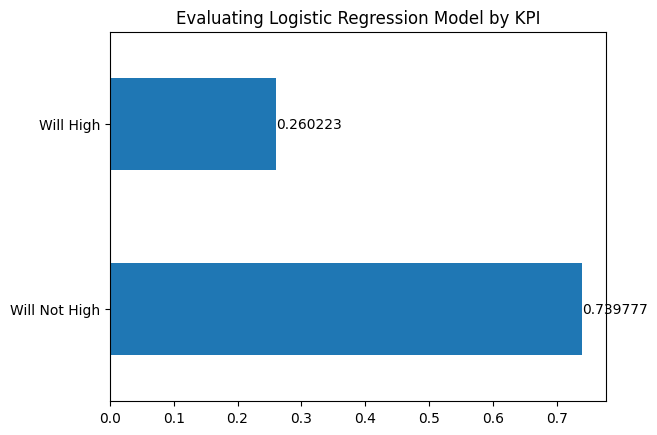

In [175]:
# 
logreg_e = X_test[list(X_test)]
logreg_e['predicted_traffic'] = y_pred_logreg
logreg_e['traffic'] = y_test

logreg_e['result'] = (
    (logreg_e['category'].map(lambda x: x in [labels_dict[cat] for cat in ['Potato', 'Pork', 'Vegetable']])) 
    & 
    # (logreg_e['predicted_traffic'] == 1)
    (logreg_e['predicted_traffic'] == logreg_e['traffic'])
    # (logreg_e['predicted_traffic'] != logreg_e['traffic'])
) # True / False

# 'Potato', 'Pork', 'Vegetable'
# , 'One Dish Meal', 'Lunch/Snacks', 'Meat', 'Dessert'

logreg_e['forecast'] = logreg_e['result'].apply(lambda x: 'Will High' if x == True else 'Will Not High')
ax = logreg_e['forecast'].value_counts(normalize=True).plot.barh()
ax.bar_label(ax.containers[0])
ax.set_title('Evaluating Logistic Regression Model by KPI');

In [168]:
logreg_e

,calories,carbohydrate,sugar,protein,category,servings,predicted_traffic,traffic,result,forecast
751,-0.891515,2.250006,0.361493,-0.644008,3,1.465064,1,0,False,Will Not High
467,-0.898361,-0.768129,3.884095,-0.593938,3,1.465064,1,1,False,Will Not High
557,-0.885596,-0.736256,1.450037,-0.528187,1,-0.840400,0,1,False,Will Not High
762,-0.135145,-0.720548,0.615055,0.034133,6,-1.416765,1,1,False,Will Not High
41,-0.322106,-0.697554,-0.545059,0.453672,1,0.312332,0,0,False,Will Not High
...,...,...,...,...,...,...,...,...,...,...
670,0.101467,-0.508365,-0.525292,0.763443,2,-1.416765,0,1,False,Will Not High
484,-0.463967,-0.657485,-0.414188,-0.584859,2,-1.416765,0,0,False,Will Not High
471,1.779921,-0.661583,0.089527,-0.334511,7,0.312332,1,1,True,Will High
457,0.796878,0.222662,-0.455767,-0.569728,8,0.312332,1,1,True,Will High


In [169]:
[labels_dict[cat] for cat in ['Potato', 'Pork', 'Vegetable']]

[8, 7, 9]

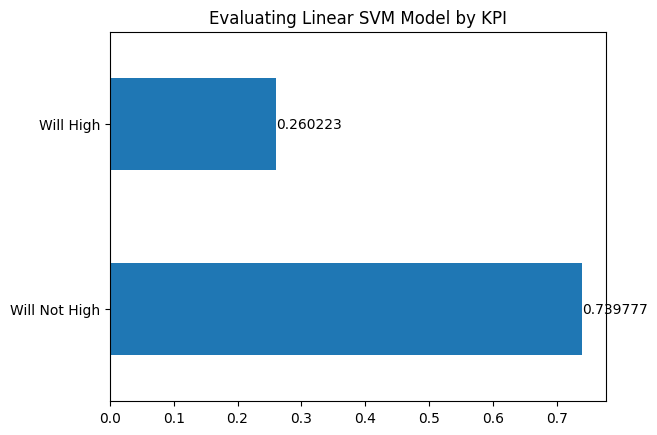

In [176]:
svm_e = X_test[list(X_test)]
svm_e['predicted_traffic'] = y_pred_svm
svm_e['traffic'] = y_test

svm_e['result'] = (
    (svm_e['category'].map(lambda x: x in [labels_dict[cat] for cat in ['Potato', 'Pork', 'Vegetable']])) 
    & 
    # (svm_e['predicted_traffic'] == 1)
    (svm_e['predicted_traffic'] == svm_e['traffic'])
    # (svm_e['predicted_traffic'] != svm_e['traffic'])
) # True / False

# 'Potato', 'Pork', 'Vegetable'
# , 'One Dish Meal', 'Lunch/Snacks', 'Meat', 'Dessert'

svm_e['forecast'] = svm_e['result'].apply(lambda x: 'Will High' if x == True else 'Will Not High')
ax = svm_e['forecast'].value_counts(normalize=True).plot.barh()
ax.bar_label(ax.containers[0])
ax.set_title('Evaluating Linear SVM Model by KPI');

In [45]:
X_test['Predicted_value'] = y_pred_svm
X_test['value'] = y_test
svm_e = X_test
# svm_e

ratio_svm = np.sum(np.abs(svm_e['Predicted_value'] - svm_e['value'])) / len(svm_e)
print(ratio_svm)

# svm_e['Diff'] = np.sum(np.abs(svm_e['Predicted_value'] - svm_e['value'])) / len(svm_e)
# svm_e['Result'] =  svm_e['Diff'] < 0.2
# svm_e['Category'] = svm_e['Result'].apply(lambda x: 'Will Not High' if x == True else 'Will High')
# ax = svm_e['Category'].value_counts(normalize=True).plot.barh()
# ax.bar_label(ax.containers[0])
# ax.set_title('Evaluating Logistic Regression Model by KPI');

0.2379182156133829


## Predictive system

Let's check Logistic Regression model for any recipe from test data:

In [66]:
n = 3 # n = 0, ..., len(X_test)
X_test.iloc[[n]]

,calories,carbohydrate,sugar,protein,category,servings
762,-0.135145,-0.720548,0.615055,0.034133,6,-1.416765


In [65]:
X_new = X_test.iloc[[3]]
y_pred_new = logreg2.predict(X_new)

if y_pred_new[0] == 1:
    print('The traffic is high')
else:
    print('The traffic is not high')

The traffic is high


# Recommendation

To help Product Manager predict the high traffic of the recipes, we can deploy this Logistic Regression Model into production. By implementing this model, about 81% of the prediction will make sure the traffic will be high. This will help Product Manager build their confidence in generating more traffic to the rest of the website.

To implement and improve the model, I will consider the following steps:

- Looking for best ways to deploy this model in terms of performance and costs. The ideal way is to deploy this machine learning model on edge devices such as mobile and IoT for its convenience and security. I will suggest deploying as web services first since it is the easiest way and test the model in newly hired product analysts.
- Collecting more data, e.g. **time to make** and **cost per serving**, **site duration time** (how long users were at the recipe page), **income links** (from what sites users came to the recipe page), **combinations of recipes** (what recipes user visited at the same session with the current recipe).
- Feature Engineering, e.g increase number of values in **category**, create more meaningful features from the variables.